# Course: Deep Learning
# Author: Sandro Camargo <sandrocamargo@unipampa.edu.br>
# Classification with Multi Layer Perceptron Example Urban Land Cover
# Dataset: https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover

A Python library is a collection of related functions. A library contains bundles of encapsuated code which can be used repeatedly in different programs.

In [1]:
# Import Libraries
import keras # Neural Network Library
from keras import layers # Layers to a neural network
from keras import optimizers # optimizers
import pandas as pd # Data Manipulation library
import numpy as np # Fast Numeric Computing library
import tensorflow as tf # Optimizers
import matplotlib.pyplot as plt # Plot library
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
import urllib.request
urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00295/Urban%20land%20cover.zip", "urbanlandcover.zip")

('urbanlandcover.zip', <http.client.HTTPMessage at 0x7a7593a1c790>)

In [3]:
import zipfile
with zipfile.ZipFile("urbanlandcover.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [4]:
# Loading training dataset
data = pd.read_csv('training.csv', delimiter=",", header=0)
# About the parameters
# Header=1: column names (day, month, year, ...) are in the line 1 of this CSV file.
# skiprows=[124,125,126,170]: this lines, which not contains valid data, are not imported. If this parameter is missing, all lines are imported.
# usecols=list(range(0,13)): The last column, which is named Classes, is not imported. If this parameter is missing, all columns are imported.

# inspecting columns and data types from "data" dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.4+ KB


In [5]:
datatest = pd.read_csv('testing.csv', delimiter=",", header=0)
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 586.3+ KB


In [6]:
classes = data.iloc[:,0]
data.drop(data.columns[[0]], axis=1, inplace=True)
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
data = pd.DataFrame(scaler.transform(data))

MinMaxScaler()


In [7]:
classestest = datatest.iloc[:,0]
datatest.drop(datatest.columns[[0]], axis=1, inplace=True)
scalertest = MinMaxScaler()
print(scalertest.fit(datatest))
MinMaxScaler()
datatest = pd.DataFrame(scaler.transform(datatest))

MinMaxScaler()


The dataset must be randomly splitted in two parts: training set and testing set. The main approaches to split are holdout and n-fold cross validation.
*   Training set is used for building (training) the model.
*   Testing set is used for testing the generalization ability of the model built.

Moreover, inputs($x$) and outputs($y$) must be splitted in each set.




In [8]:
# Creating the training dataset
train_x = data
train_y = label_binarize(classes, classes=['tree ', 'grass ', 'soil ', 'concrete ', 'asphalt ', 'building ', 'car ', 'pool ', 'shadow '])

# Creating the testing dataset
test_x = datatest
test_y = label_binarize(classestest, classes=['tree ', 'grass ', 'soil ', 'concrete ', 'asphalt ', 'building ', 'car ', 'pool ', 'shadow '])

# Verifying dataset dimensions
print('The training dataset (inputs) dimensions are: ', train_x.shape)
print('The training dataset (outputs) dimensions are: ', train_y.shape)
print('The testing dataset (inputs) dimensions are: ', test_x.shape)
print('The testing dataset (outputs) dimensions are: ', test_y.shape)

The training dataset (inputs) dimensions are:  (168, 147)
The training dataset (outputs) dimensions are:  (168, 9)
The testing dataset (inputs) dimensions are:  (507, 147)
The testing dataset (outputs) dimensions are:  (507, 9)


After creating the datasets, the next step is defining the architecture of our model.

It must be defined:


*   Architecture: in terms of neurons and layers
*   Optimizer: is the algorithm or method used to change the weights in order to minimize the loss function.

The last step is compiling the model. In this step the loss function, the optimizer and the evaluation metrics must be defined.

In [9]:
# Function to define model architecture
def build_model():
  # Defining the architecture
  # Sequential = Feedforward Neural Network
  # 1 single neuron
  # input_shape is the amount of columns from training set
  model = keras.Sequential([
        layers.Dense(18, input_shape = [len(train_x.columns)], activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(9, activation="softmax")
  ])

  # Defining the optimizer
  optimizer = tf.keras.optimizers.RMSprop(
      learning_rate = 0.001)

  # Mean Squared Error (MSE) is the default loss function in regression models
  model.compile(loss = 'categorical_crossentropy',
      optimizer = optimizer,
      metrics = ['categorical_crossentropy','accuracy'])

  return model

Just for curiosity, you should observe how many parameters ($\theta$) your model has.
At this point, your model is built.

In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                2664      
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 dense_2 (Dense)             (None, 9)                 117       
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


After creating the model, it must be trained (fitted).
Training is done using training set and the amount of epochs must be defined.

In [11]:
EPOCHS = 250

history = model.fit(
    train_x, train_y, epochs = EPOCHS, verbose = 1
)

Epoch 1/250
6/6 [==============================] - 2s 9ms/step - loss: 2.2203 - categorical_crossentropy: 2.2203 - accuracy: 0.1310
Epoch 2/250
6/6 [==============================] - 0s 7ms/step - loss: 2.1552 - categorical_crossentropy: 2.1552 - accuracy: 0.2262
Epoch 3/250
6/6 [==============================] - 0s 5ms/step - loss: 2.1304 - categorical_crossentropy: 2.1304 - accuracy: 0.2143
Epoch 4/250
6/6 [==============================] - 0s 5ms/step - loss: 2.1010 - categorical_crossentropy: 2.1010 - accuracy: 0.2381
Epoch 5/250
6/6 [==============================] - 0s 5ms/step - loss: 2.0787 - categorical_crossentropy: 2.0787 - accuracy: 0.2440
Epoch 6/250
6/6 [==============================] - 0s 6ms/step - loss: 2.0639 - categorical_crossentropy: 2.0639 - accuracy: 0.2262
Epoch 7/250
6/6 [==============================] - 0s 5ms/step - loss: 2.0355 - categorical_crossentropy: 2.0355 - accuracy: 0.2857
Epoch 8/250
6/6 [==============================] - 0s 5ms/step - loss: 2.006

This plot should be generated just to inspect the learning convergence.
It is expected a decreasing of the loss function value through the epochs.


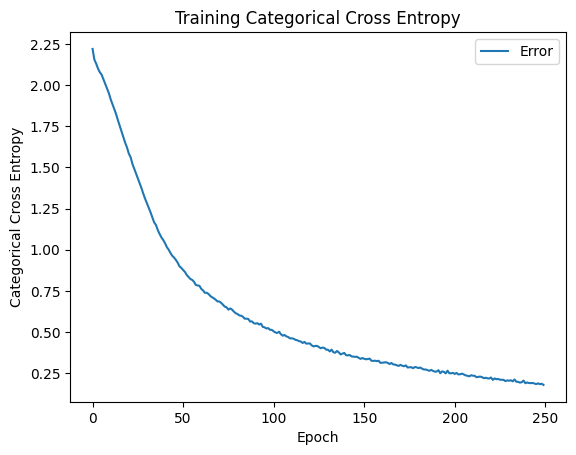

In [12]:
plt.plot(history.history['categorical_crossentropy'])
plt.title('Training Categorical Cross Entropy')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Error'], loc='upper right')
plt.savefig("trainingerror.pdf")
plt.show()

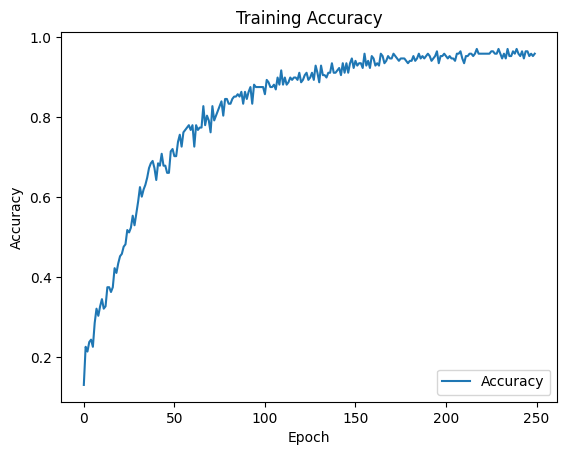

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='lower right')
plt.savefig("trainingaccuracy.pdf")
plt.show()

After the training process, the knowledge learnt by a neural network is stored in its weights.

After the training process, the model should be tested in order to measure its quality, it means, how good are its predictions. The model must be evaluated using the testing set, which is composed by samples that are not in the training set. In regression problems, the correlation coefficient is the default metric to measure the model quality.
The correlation coefficient is computed using real outputs ($y$) and predicted outputs ($\hat{y}$). Correlation coefficient can vary between 0 (bad predictions) and 1 (perfect predictions).

In [14]:
test_predictions = model.predict(test_x) # predict randon activities with the built linear regression model
print(confusion_matrix(test_predictions.argmax(axis=1), test_y.argmax(axis=1)))
print(classification_report(test_predictions.argmax(axis=1), test_y.argmax(axis=1), target_names=['tree ', 'grass ', 'soil ', 'concrete ', 'asphalt ', 'building ', 'car ', 'pool ', 'shadow ']))
print('The accuracy on the test set is equal to: %.4f ' % accuracy_score(test_predictions.argmax(axis=1), test_y.argmax(axis=1)))

16/16 [==============================] - 0s 5ms/step
[[78 25  0  2  3  1  1  1  1]
 [ 4 49  5  1  0  0  0  0  0]
 [ 0  6 10  5  0  1  1  0  0]
 [ 0  0  3 77  0 23  1  0  0]
 [ 0  0  0  0 35  1  0  0  7]
 [ 0  1  1  7  0 68  0  1  0]
 [ 2  2  1  1  0  2 18  0  1]
 [ 0  0  0  0  0  0  0 12  3]
 [ 5  0  0  0  7  1  0  0 33]]
              precision    recall  f1-score   support

       tree        0.88      0.70      0.78       112
      grass        0.59      0.83      0.69        59
       soil        0.50      0.43      0.47        23
   concrete        0.83      0.74      0.78       104
    asphalt        0.78      0.81      0.80        43
   building        0.70      0.87      0.78        78
        car        0.86      0.67      0.75        27
       pool        0.86      0.80      0.83        15
     shadow        0.73      0.72      0.73        46

    accuracy                           0.75       507
   macro avg       0.75      0.73      0.73       507
weighted avg       0.77   

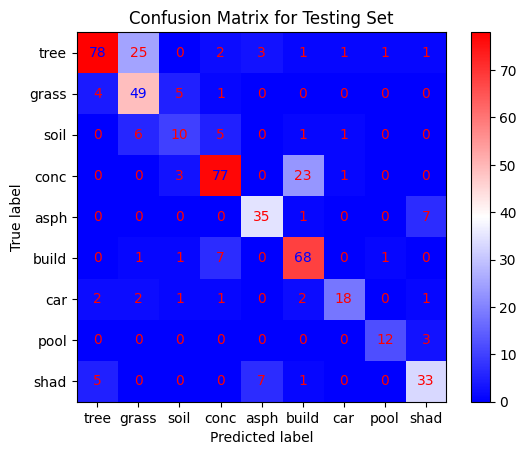

In [15]:
cm = confusion_matrix(test_predictions.argmax(axis=1), test_y.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['tree', 'grass', 'soil', 'conc', 'asph', 'build', 'car', 'pool', 'shad'])
disp.plot(cmap="bwr")
plt.title('Confusion Matrix for Testing Set')
plt.savefig("confusionmatrix.pdf")
plt.show()

In [16]:
train_predictions = model.predict(train_x)
print(confusion_matrix(train_predictions.argmax(axis=1), train_y.argmax(axis=1)))
print(classification_report(train_predictions.argmax(axis=1), train_y.argmax(axis=1), target_names=['tree ', 'grass ', 'soil ', 'concrete ', 'asphalt ', 'building ', 'car ', 'pool ', 'shadow ']))
print('The accuracy on the training set is equal to: %.4f ' % accuracy_score(train_predictions.argmax(axis=1), train_y.argmax(axis=1)))

6/6 [==============================] - 0s 6ms/step
[[16  2  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0]
 [ 1  0 13  0  0  0  0  0  0]
 [ 0  0  1 22  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0]
 [ 0  0  0  1  0 25  0  1  0]
 [ 0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  1  0  0  0 16]]
              precision    recall  f1-score   support

       tree        0.94      0.89      0.91        18
      grass        0.93      1.00      0.96        27
       soil        0.93      0.93      0.93        14
   concrete        0.96      0.96      0.96        23
    asphalt        0.93      1.00      0.96        13
   building        1.00      0.93      0.96        27
        car        1.00      1.00      1.00        15
       pool        0.93      1.00      0.97        14
     shadow        1.00      0.94      0.97        17

    accuracy                           0.96       168
   macro avg       0.96      0.96      0.96       168
weighted avg       0.96     

In [19]:
!pip3 install visualkeras
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
#visualkeras.layered_view(model, to_file='output.png') # write to disk
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 11.4 MB/s eta 0:00:00
